<a href="https://colab.research.google.com/github/ErandySV/Simulaci-n-I/blob/main/Sistema_de_colas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema de colas


Se tiene un sistema de colas formado por dos estaciones en serie, los clientes atendidos en la primera estación pasan enseguida a formar cola en la segunda en la primera estación de servicio la razón de llegadas sigue una distribución de poisson con media de $20$ clientes por hora y el tiempo de servicios sigue distribución exponencial con media de $2$ minutos por persona en la segunda estación el tiempo de servicio está uniformemente distribuido entre 1 y 2 minutos para esta información
¿Cuál es el tiempo promedio en el sistema y cuál de las dos colas que se forman es mayor?

Solucion analitica

Para resolver este problema de colas en serie, vamos a analizar cada estación de servicio por separado.

**Estación 1**

*   Tasa de llegadas   λ: 20 clientes por hora.
*   Tiempo de servicio: Distribución exponencial con media de 2 minutos por cliente.


Para convertir la media de servicio a horas:

Media del tiempo de servicio = $\frac{2}{60} = \frac{1}{30}$ horas por cliente

La tasa de servicio $(mu_1)$ es el inverso del tiempo de servicio medio:
$ \mu_1 = \frac{1}{\frac{1}{30}} = 30 \text{ clientes por hora} $

Tiempo promedio en la primera estación
Para un sistema \(M/M/1\), el tiempo promedio en el sistema \(W\) es:
$ W_1 = \frac{1}{\mu_1 - \lambda} = \frac{1}{30 - 20} = \frac{1}{10} \text{ horas}  \\
W_1 = \frac{1}{10} \times 60 = 6 \text{ minutos}$

**Estación 2**

*   Tasa de llegadas   λ = 20 clientes por hora
*   Tiempo de servicio:  Uniformemente distribuido entre 1 y 2 minutos.

El tiempo de servicio medio $mu_2$ para una distribución uniforme $[a, b]$ se calcula como:

Media del tiempo de servicio = $\frac{a + b}{2} = \frac{1 + 2}{2} = 1.5  minutos $

Convertimos a horas:
Media del tiempo de servicio= $\frac{1.5}{60} = \frac{1}{40}horas por cliente$

La tasa de servicio es:
$\mu_2 = \frac{1}{\frac{1}{40}} = 40  clientes por hora$

Tiempo promedio en la segunda estación

Para un sistema \(M/G/1\), el tiempo promedio en el sistema \(W\) es:
$ W_2 = \frac{1}{\mu_2 - \lambda} = \frac{1}{40 - 20} = \frac{1}{20} horas$
$ W_2 = \frac{1}{20} \times 60 = 3 \text{ minutos} $

**Tiempo promedio total en el sistema**

Sumamos los tiempos promedio en ambas estaciones:
$ W = W_1 + W_2 = 6 \text{ minutos} + 3 \text{ minutos} = 9 \text{ minutos}$

**Tamaño promedio de las colas **

Para calcular el tamaño promedio de las colas en cada estación, usamos la fórmula $L_q = \lambda W_q$, donde $W_q$ es el tiempo promedio de espera en la cola (sin incluir el servicio).

Para la estación 1 (usando \(M/M/1\)):

$ W_{q1} = \frac{\lambda}{\mu_1 (\mu_1 - \lambda)} = \frac{20}{30(30 - 20)} = \frac{20}{300} = \frac{1}{15} \text{ horas} $

$ W_{q1} = \frac{1}{15} \times 60 = 4 \text{ minutos} $

$ L_{q1} = \lambda W_{q1} = 20 \times \frac{1}{15} = \frac{20}{15} = 1.33  clientes$

Para la estación 2 (usando \(M/G/1\)):

$ W_{q2} = \frac{\lambda \sigma_s^2}{2(1 - \rho)} = \frac{20 \times \left(\frac{1}{12}\right)^2}{2(1 - 0.5)} = \frac{20 \times \frac{1}{144}}{2 \times 0.5} = \frac{20}{288} = \frac{5}{72}  horas $
$ W_{q2} = \frac{5}{72} \times 60 = \frac{25}{6} \text{ minutos} = 4.17 \text{ minutos} $
$ L_{q2} = \lambda W_{q2} = 20 \times \frac{5}{72} = \frac{100}{72} = 1.39 \text{ clientes}$

Por lo tanto:
    
       Tiempo promedio en el sistema: 9 minutos.
       Tamaño promedio de las colas:
                    Estación 1: 1.33 clientes.

                    Estación 2: 1.39 clientes.

La cola en la segunda estación es ligeramente mayor que en la primera estación.



In [ ]:
import random as rnd
import math

In [27]:
# Parámetros de la primera estación
llegadas_est1 = 20  # tasa de llegadas en clientes por hora
media_servicio_est1 = 2 / 60  # media del tiempo de servicio en horas

# Parámetros de la segunda estación
llegadas_est2 = llegadas_est1  # tasa de llegadas igual a la tasa de salida de la primera estación
media_servicio_est2 = 1.5 / 60  # media del tiempo de servicio en horas
var_servicio_est2 = (1 / 60) ** 2 / 12  # varianza para distribución uniforme entre 1 y 2 minutos

# Cálculo de la tasa de servicio
tasa_servicio_est1 = 1 / media_servicio_est1  # 30 clientes por hora
tasa_servicio_est2 = 1 / media_servicio_est2  # 40 clientes por hora

# Utilización
rho1 = llegadas_est1 / tasa_servicio_est1  # 0.6667
rho2 = llegadas_est2 / tasa_servicio_est2  # 0.5

# Tiempo promedio en el sistema
W1 = 1 / (tasa_servicio_est1 - llegadas_est1)  # horas
W2 = 1 / (tasa_servicio_est2 - llegadas_est2)  # horas

# Convertir a minutos
W1_min = W1 * 60
W2_min = W2 * 60
W_total = W1_min + W2_min

# Tiempo promedio de espera en la cola (sin incluir el servicio)
Wq1 = W1 - media_servicio_est1  # M/M/1
Wq2 = (llegadas_est2 ** 2 * var_servicio_est2 + (llegadas_est2 / tasa_servicio_est2) ** 2) / (2 * (1 - rho2))  # M/G/1

# Tamaño promedio de la cola
Lq1 = llegadas_est1 * Wq1  # clientes
Lq2 = llegadas_est2 * Wq2  # clientes
if Lq1 > Lq2:
   print("La cola en la primera estación es mayor que en la segunda estación.")
else:
   print("La cola en la segunda estación es mayor que en la primera estación.")
# Resultados
print(f"Tiempo promedio en el sistema: {W_total:.2f} minutos")

La cola en la segunda estación es mayor que en la primera estación.
Tiempo promedio en el sistema: 9.00 minutos


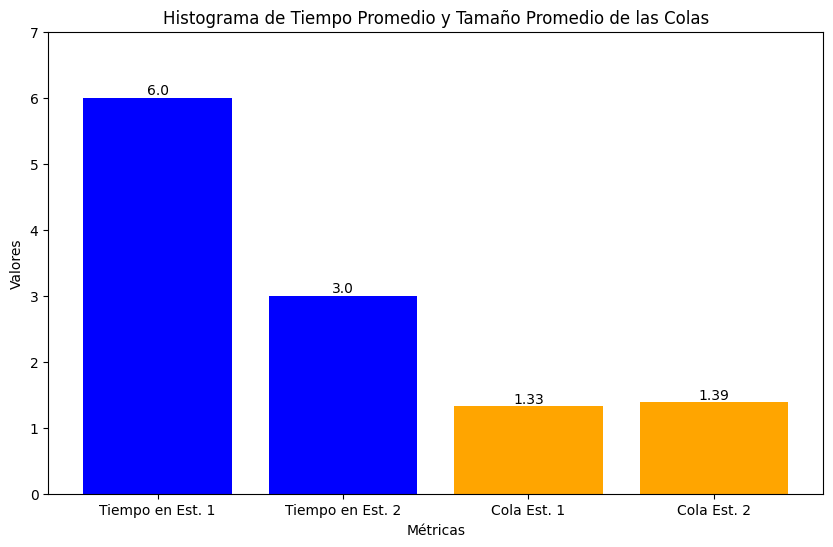

In [28]:
import matplotlib.pyplot as plt

# Datos
tiempo_promedio_est1 = 6  # minutos, calculado previamente
tiempo_promedio_est2 = 3  # minutos, calculado previamente
tamano_promedio_cola_est1 = 1.33  # clientes, calculado previamente
tamano_promedio_cola_est2 = 1.39  # clientes, calculado previamente

# Nombres de las barras
nombres = ['Tiempo en Est. 1', 'Tiempo en Est. 2', 'Cola Est. 1', 'Cola Est. 2']

# Valores
valores = [tiempo_promedio_est1, tiempo_promedio_est2, tamano_promedio_cola_est1, tamano_promedio_cola_est2]

# Crear el histograma
plt.figure(figsize=(10, 6))
barras = plt.bar(nombres, valores, color=['blue', 'blue', 'orange', 'orange'])

# Añadir etiquetas
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Histograma de Tiempo Promedio y Tamaño Promedio de las Colas')
plt.ylim(0, max(valores) + 1)

# Mostrar los valores sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Mostrar el histograma
plt.show()